<a href="https://colab.research.google.com/github/shannonmels/public-projects/blob/main/Portfolio_CS2215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS2215 - Data Analytics for DH 2

*Shannon Mels - CS2215*

## Declaration

By submitting this assignment. I agree to the following:

<font color="red">“I have read and understand the UCC academic policy on plagiarism and I agree to the
requirements set out thereby in relation to plagiarism and referencing. I confirm that I
have referenced and acknowledged properly all sources used in preparation of this
assignment.
I declare that this assignment is entirely my own work based on my personal study. I
further declare that I have not engaged the services of another to either assist me in, or
complete this assignment”</font>



# Part 1 - Dataset Load - Social Media Engagement
The Social Media Engagement database contains information on 1000 posts from the platforms Twitter, Facebook, and Instagram. I picked this dataset becuase I am interested in analyzing the behaviour of users on social media. For each post, the dataset includes the following variables:

* post_id
* platform (Twitter, Facebook, or Instagram)
* post_type (Format)
* post_time (Date and time)
* caption
* hashtags
* likes
* comments
* shares
* caption_length
* num_hashtags
* post_hour
* post_day
* sentiment_score (Positive, negative, or neutral)

These variables can provide insights into which factors significantly influence post-engagement levels, and when users are most active on social media.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/shannonmels/cs2215/refs/heads/main/social_media_engagement.csv')

In [ ]:
df.shape

(1000, 14)

In [ ]:
df.dtypes

,0
post_id,int64
platform,object
post_type,object
post_time,object
caption,object
hashtags,object
likes,int64
comments,int64
shares,int64
caption_length,int64


The dataset contains 14 different variables of a 1000 posts, both numerical (integers), such as the amount of engagement and post hour, and categorical (objects), such as the platform on which it is posted, the format of the post, and the day it is posted.

## Part 2.1 - Line Plot
I want to investigate during which hours of the day users are most active on social media.


<Axes: title={'center': 'Amount of total engagement each hour of the day'}, xlabel='Hour of the day', ylabel='Sum of likes, shares, and comments'>

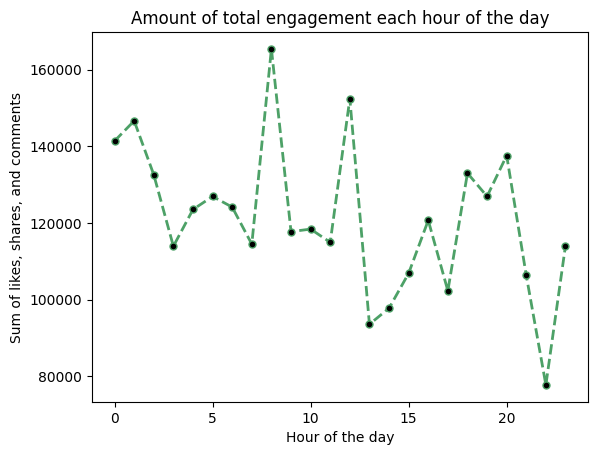

In [ ]:
df['engagement'] = df['likes'] + df['comments'] + df['shares']
df.groupby('post_hour')['engagement'].sum().plot.line(title="Amount of total engagement each hour of the day",
                                                      ylabel = 'Sum of likes, shares, and comments',
                                                      xlabel = 'Hour of the day',
                                                      color = (77/255, 161/255, 103/255,1),
                                                      linewidth = '2',
                                                      linestyle = 'dashed',
                                                      marker = 'o',
                                                      markersize = '5',
                                                      markerfacecolor = 'black')

There are significant peaks around 8 AM and 12 PM, meaning that all posts together get more likes, comments, and shares around these times and users are therefore more active. It suggests that when people wake up/ start their work, they are active on their social media for the day and probably also check in during lunch break. From 4 PM till 8 PM, the engagement also increases, perhaps because people have finished their work/ school. There is also a significant low point at 10 PM, possibly due to people going off their phones at the end of the day. However, as activity immediately rises again after 10 PM, this last analysis could be questioned.

## Part 2.2 - Bar Plot
I want to analyse the frequency of different types of engagement (likes, shares, comments) that occur on average per post on different platforms Twitter, Facebook, and Instagram.

<Axes: title={'center': 'Average engagement per post on different platforms'}, xlabel='Platform', ylabel='Average engagement'>

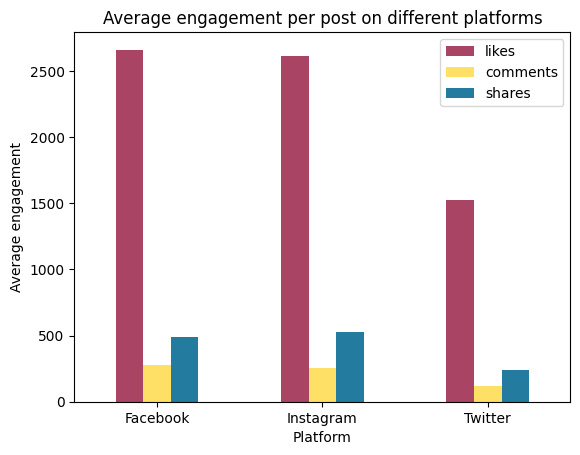

In [ ]:
df.groupby('platform')[['likes','comments','shares']].mean().plot.bar(title='Average engagement per post on different platforms',
                                                                      xlabel='Platform',
                                                                      ylabel='Average engagement',
                                                                      color=[(170/255, 68/255, 101/255,1),(255/255, 224/255, 102/255,1),(36/255, 123/255, 160/255,1)],
                                                                      rot=0)

While Facebook and Instagram have a similar average engagement per post, Twitter has significantly lower engagement. This could have multiple causes, one of which is the audience. While Facebook and Instagram are often used to share personal updates with friends and family (who are more likely to engage with posts), Twitter is more often used to share thoughts and opinions with a broader audience of strangers (who might be less likely to interact with posts.)

On all platforms, 'likes' are the most common form of engagement, followed by 'shares', while 'comments' are the least frequent. The distribution of these forms of engagement is similar across all platforms. This can likely be attributed to the fact that liking a post is significantly the easiest on all platforms (a single click), while sharing takes a little more effort (multiple clicks, and a decision on the recipient), and commenting demands the most effort (various clicks, and thoughtful input).


## Part 2.3 - Boxplot and Univariate Analysis
I want to investigate the relationship between the sentiment score of posts (positive, neutral or negative) and distribution of the amount of comments they receive.

In [ ]:
df['comments'].describe()

,comments
count,1000.000000
mean,218.247000
std,141.891822
min,10.000000
25%,97.000000
50%,186.000000
75%,327.250000
max,500.000000


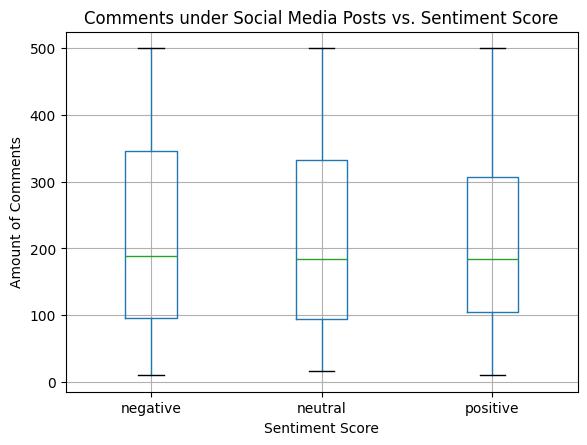

In [ ]:
import matplotlib.pyplot as plt

df.boxplot(column='comments', by='sentiment_score')

plt.title('Comments under Social Media Posts vs. Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Amount of Comments')

plt.suptitle('')

plt.show()


On average, posts receive 218 comments, with a median of 186. Since the median is lower than the average, and this is true for all sentiment scores, it suggests that there are some outliers with exceptionally high comment counts. These could possibly be viral posts that drive up the average.

The high interquartile range (IQR) of 230.25 (Q3: 327.25 - Q1: 97.00) and a standard deviation of 141.89 indicate high variability (as the minimu is 10 and the maximum 500), meaning the number of comments per post fluctuates widely. This is logical, as different accounts, posts, etc. are likely to have a different level of engagement.

A shorter lower whisker (from the minimum of 10 to Q1 at 97) and shorter lower box (Q1 to median at 186) compared to a longer upper whisker (from Q3 at 327 to the maximum of 500) and a longer upper box (median to Q3), suggest that the data is right-skewed. This means that most posts receive a lower number of comments (more dense data points), while a few posts gain significantly more engagement, likely because maintaining a consistently high engagement across all posts is difficult. Since the median is 186, half of the posts receive fewer than 186 comments, and half receive more.  

When comparing sentiment scores, the overall distribution of comment counts is similar across different sentiment scores. However, one noteworthy difference is that the upper whisker shortens as sentiment becomes more negative.
This suggests that comment counts for negative posts are more concentrated toward the higher end, meaning that negative posts are more likely to receive a large number of comments. A possible explanation is that negative posts evoke stronger reactions, leading to more discussion, whereas positive posts may not inspire as much engagement.


# Part 3 - Dataset Load - Travel Trips
The Traveler Trip database contains information of over a 100 travelers from all over the world. I choose this dataset because I am interested in seeing how factors like age, gender, and destination influence travel preferences and behavior. For each traveler, the dataset includes the following variables:

* Trip ID
* Destination
* Start date
* End date
* Duration (days)
* Traveler name
* Traveler age
* Traveler gender
* Traveler nationality
* Accommodation type
* Accommodation cost
* Transportation type
* Transportation cost

These variables can provide insights into which factors significantly influence travel preferences, and how demographics like age, gender, and country of origin affect travelers' choices.




In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/shannonmels/cs2215/refs/heads/main/Travel%20details%20dataset%20(1).csv')

In [ ]:
df.shape

(139, 13)

In [ ]:
df.dtypes

,0
Trip ID,int64
Destination,object
Start date,object
End date,object
Duration (days),float64
Traveler name,object
Traveler age,float64
Traveler gender,object
Traveler nationality,object
Accommodation type,object


The dataset contains 13 different variables of 139 different travelers, both numerical (integers), such as the duration of the flight and the age of the traveler, and categorical (objects), such as the destination, accommodation and transportation type, and the travelers' gender.

## Part 4.1 - Pie Plot
I want to investigate what accommodation type travelers prefer to stay in.

<Axes: title={'center': 'Choice of accommodation type'}>

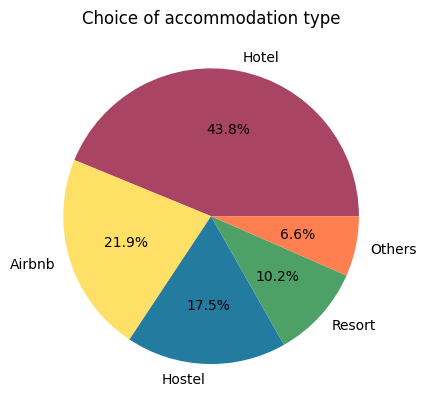

In [ ]:
df_accommodation = df['Accommodation type'].value_counts().sort_values(ascending = False)
df_top_accommodation = df_accommodation.iloc[:4]
df_top_accommodation.loc["Others"] = df_accommodation.sum() - df_top_accommodation.sum()

df_top_accommodation.plot.pie(autopct='%1.1f%%',
                              ylabel = "", title = "Choice of accommodation type",
                              colors = [(170/255, 68/255, 101/255,1),(255/255, 224/255, 102/255,1),(36/255, 123/255, 160/255,1),(77/255, 161/255, 103/255,1),(255/255, 127/255, 81/255, 1)])

Nearly half of all travelers choose to stay in hotels (43.8%), making that the most popular choice of accommodation. It is probably a common choice because of its convenience, dependability and luxuries, including room service and housekeeping. Airbnb was chosen by 21.9% of travelers, making it the second most popular choice. This might be due to its affordable rates and nice atmosphere. Another common choice was hostels (17.5%), most likely attracting backpackers and tourists on a budget. Although resorts provide luxury, they were a less popular choice, potentially due to their higher prices. Not many travelers choose to stay at alternative accommodation types, as the 'Other' portion is the smallest.

## Part 4.2 - Histogram Plot
I want to investigate people of which age are most likely to travel.


<Axes: title={'center': 'Amount of travelers per age'}, xlabel='Traveler Age', ylabel='Number of travellers'>

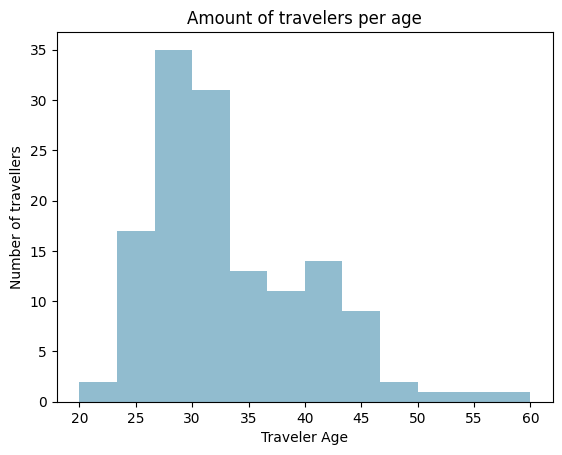

In [ ]:
df['Traveler age'].plot.hist(title='Amount of travelers per age',
                             xlabel='Traveler Age',
                             ylabel='Number of travellers',
                              bins=12,
                              alpha=0.5,
                              color=(36/255, 123/255, 160/255,1))

Most travelers are around the ages of 25 to 35. This is probably because people of this age range often have the money, in contrast to younger people, and still have a lot of free time. After the age of 35, the amount of travelers declines. Work obligations and family responsibilities could be causing this change. There is an even further drop after the age of 50, possibly because of changing interests.

## Part 4.3 - Boxplot and Univariate Analysis
I want to analyse the how the distribution of money paid for accommodation varies over different accommodation types.

In [ ]:
# remove dollar sign for accommodation cost (and convert to integer)
df=df.fillna(0)
df['Accommodation cost'] = df['Accommodation cost'].replace('\D', '', regex=True).astype(int)

df['Accommodation cost'].describe()

,Accommodation cost
count,139.000000
mean,1227.194245
std,1335.937509
min,0.000000
25%,550.000000
50%,900.000000
75%,1200.000000
max,8000.000000


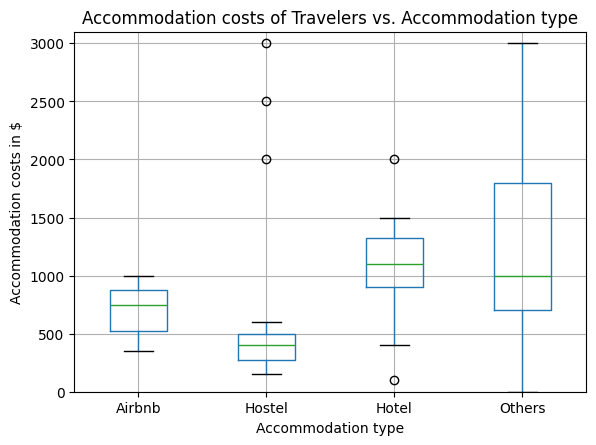

In [ ]:
# create 'other' category
df_accommodation = df['Accommodation type'].value_counts().sort_values(ascending=False)
df_top_accommodation = df_accommodation.iloc[:3]
df['Accommodation type'] = df['Accommodation type'].where(df['Accommodation type'].isin(df_top_accommodation.index), 'Others')

# plot the boxplot
df.boxplot(column='Accommodation cost', by='Accommodation type')

plt.title('Accommodation costs of Travelers vs. Accommodation type')
plt.xlabel('Accommodation type')
plt.ylabel('Accommodation costs in $')

plt.suptitle('')
plt.ylim(0, 3100)
plt.show()

On average, travelers spend 1227 dollars on accommodation when traveling, but the median cost is lower at 900 dollars. This gap suggests that there are a few outliers, in this case, travelers who spent significantly more on their trip, for example on a luxury vacation. The interquartile range (IQR) of 650 (Q3: 1200 - Q1: 550) shows a moderate spread in costs for most travelers (Considering the minimum is 0 and the maximum is 8000). However, the high standard deviation (1335.94), further shows that extreme values of outliers significantly impact the dataset.

From the boxplot, it is clear that different accommodation types vary in price. Hostels are the cheapest option, followed by Airbnb, while hotels are the most expensive. The Other category includes a mix of accommodations across all price ranges, such as B&Bs and resorts.

The plots also show the difference in price variability. Hostels have the smallest range, suggesting relatively consistent pricing, whereas Airbnbs and hotels have a wider spread, likely due to larger variability in luxury and quality. The Other category displays the highest variability in the boxplot, which aligns with expectations since it represents a large range of accommodations, leading to a wider spread of prices.

Comparing the distributions, there is a left-skewness for Hostels, Airbnbs, and Hotels, meaning that while most travelers pay a relatively high price, a few pay significantly less. This could be due to discounts or seasonal deals. In contrast, the 'Other' category is right-skewed, indicating that most travelers pay on the lower end. As this category includes expensive accommodations such as resorts, there are some extremer higher data points, explaining the risht-skewed plot.

## Part 4.4 - Scatterplot
I want to investigate the correlation between the trip expenses and trip duration.

<Axes: title={'center': 'Relationship Between Trip Duration and Total Cost'}, xlabel='Duration of the trip in days', ylabel='Cost in $'>

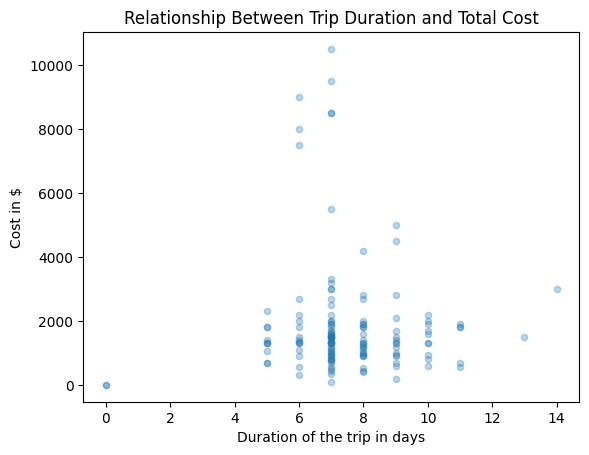

In [ ]:
# remove dollar sign fortransportation cost (and convert to integer) (already done for accommodation cost)
df['Transportation cost'] = df['Transportation cost'].replace('\D', '', regex=True).astype(int)

# plot the scatterplot
df['Total cost'] = df['Transportation cost'] + df['Accommodation cost']

df.plot.scatter(x= "Duration (days)",
                y = "Total cost",
                title ='Relationship Between Trip Duration and Total Cost' ,
                xlabel='Duration of the trip in days',
                ylabel ='Cost in $',
                marker='o',
                alpha=0.3)

Most trips are between 5 to 10 days, with a high concentration around 7-8 days. Interestlingly, there is not a clear correlation between the trip duration and the costs, as the trips do not become more expensive as the duration of the trip increases. While this is the opposite of what might be expected, as it is more expensive to pay the same accommodation for a longer time, it could possibly be explained by the budget people choose to travel in. When they only leave for a couple of days they feel like they can splurge and spent money on a more luxurious vacation. While, if they leave for longer they decide to go for cheaper options.

## Part 4.5 - Area Plot
I want to investigate whether travel demographics, specifically gender, change over age.


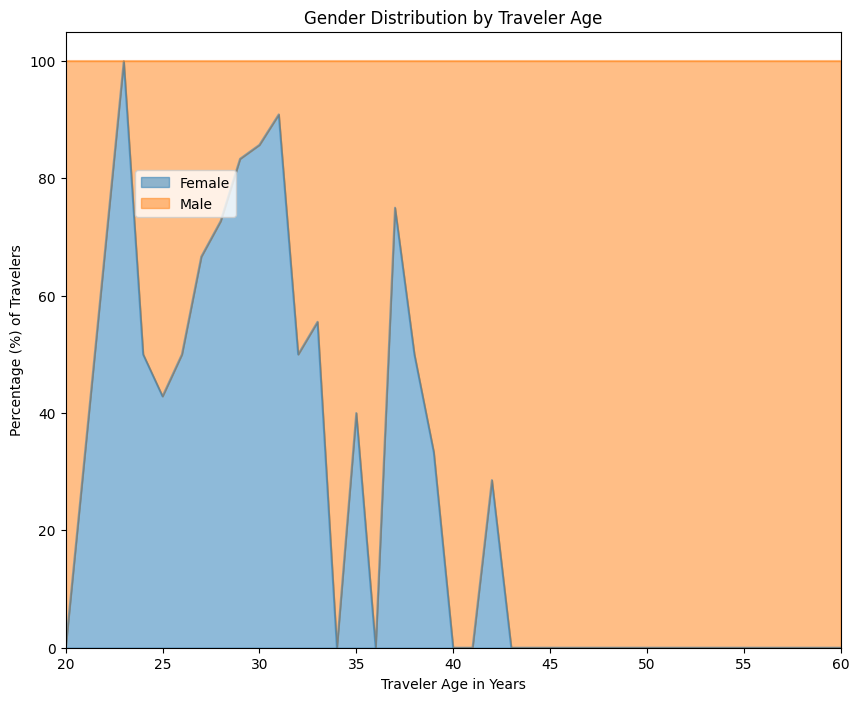

In [ ]:
#remove 0 value
df = df.loc[df['Traveler gender'].isin(['Male', 'Female'])]

# count the occurrences of each accommodation type for each traveler age
accommodation_counts = df.groupby(['Traveler age', 'Traveler gender']).size().unstack(fill_value=0)

# create a dataframe with percentages
accommodation_percentages = accommodation_counts.div(accommodation_counts.sum(axis=1), axis=0) * 100

# plot the area chart with the counts
accommodation_percentages.plot.area(
    title="Gender Distribution by Traveler Age",
    xlabel='Traveler Age in Years',
    ylabel='Percentage (%) of Travelers',
    alpha=0.5,
    figsize=(10, 8))

plt.xlim(20, 60)  # no data available before 20 years old or after 60 years old
plt.legend(loc=(0.09, 0.7))
plt.show()

There are some big swings in gender distribution at different ages, so a possible lack of data points should be considered.

That said, from around 22 to 32, there are slightly more female travelers, but after 32, this representation drops fast. For men, it’s the opposite. They make up a smaller share in the 22-32 range but become the main group after that. This could be due to societal expectations, as women often face more pressure around family, career, or caregiving, as they get older, which might limit their travel. Men, on the other hand, generally have fewer constraints and might even travel more as they gain financial stability.

After 43, it’s only male travelers, with no single female traveler. While men might be traveling more for the reasons mentioned earlier, this seems a bit extreme, so a lack of data points is likely playing a role as well.

# Part 5 - Conclusion



This semester, I have used two different data sets: one with *social media engagement* data and another with *travel trip* data. Using these data sets, I have practiced my data analysis with Python.

The social media engagement data set was an interesting data set to experiment with because it showed that engagement differs by platform, hour, and sentiment. The traveler trip data set allowed me to visualize the traveler decisions, sometimes in combination with the demographic characteristics of the travelers. For both of these data sets, I first explored, cleaned, and visualized the datasets, and then I wrote an analysis.

By doing the assignments, I gained an understanding of how to load, explore, and process data with the libraries Pandas, Matplotlib, and NumPy. I got to practice different operations such as grouping, filtering, and data transformation. Issues like missing values and outliers allowed me to learn how to handle datasets. Finally, it was very useful to understand which graphs are most suitable for certain data, as it is important to be critical about how data is presented.

Overall, this semester did not only improve my coding skills but also taught me how to turn data it into clear and meaningful visualizations and analysis.